In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [2]:
grd_df=pd.read_csv('grades.csv')

In [3]:
grd_df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
grd_df.shape

(571, 43)

In [5]:
grd_df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
grd_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
# here it is clear that missing values are there in the dataset

In [56]:
grd_df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


#Here from the above output it is clear that other than CGPA all features are of oject type so we are not getting the statstistical summary of that features

In [7]:
grd_df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


<Axes: >

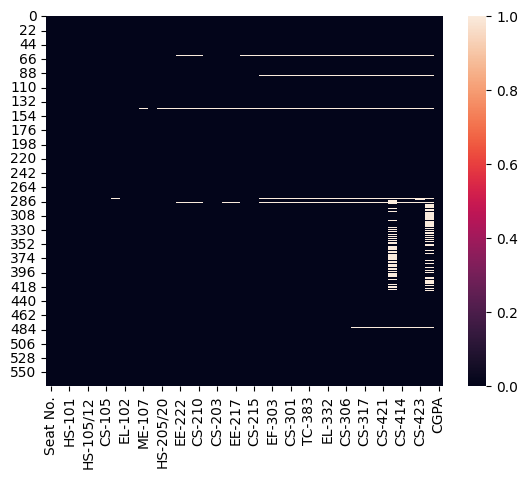

In [8]:
sns.heatmap(grd_df.isnull())

from the heat map it is clear that there is a presence of missing values in the dataset because of different color coding scheme in the dataset

In [9]:
#checking for the value counts of each data in the dataset
for i in grd_df.columns:
    print(grd_df[i].value_counts())

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64
CS-105
A     15

In [10]:
#checking for no of unique value of each data in the dataset
grd_df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

<Axes: xlabel='count', ylabel='PH-121'>

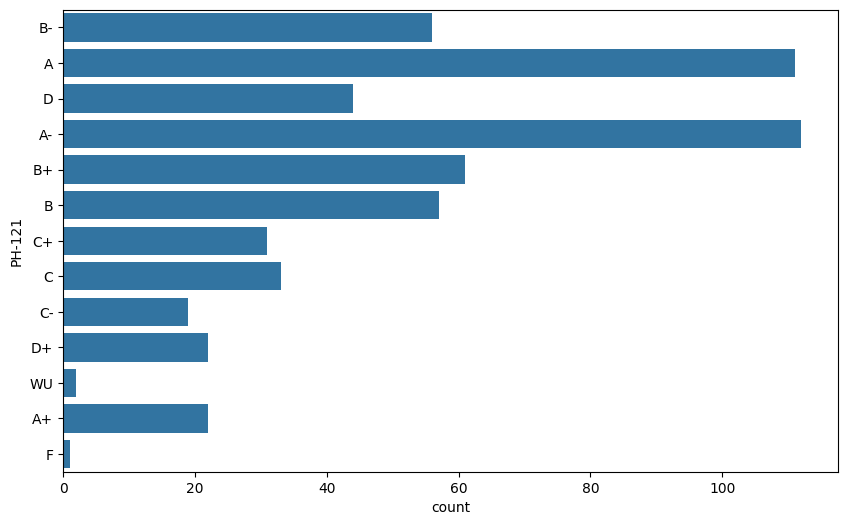

In [61]:
fig=plt.figure(figsize=(10,6))
sns.countplot(grd_df.iloc[:,1])

here from the above countplot  for course code PH-121 i observed that majority of the candidate got A and A- grade A(111 candidate)and A-(112 candidate) and only 1 student is failed in this course code

<Axes: xlabel='count', ylabel='HS-101'>

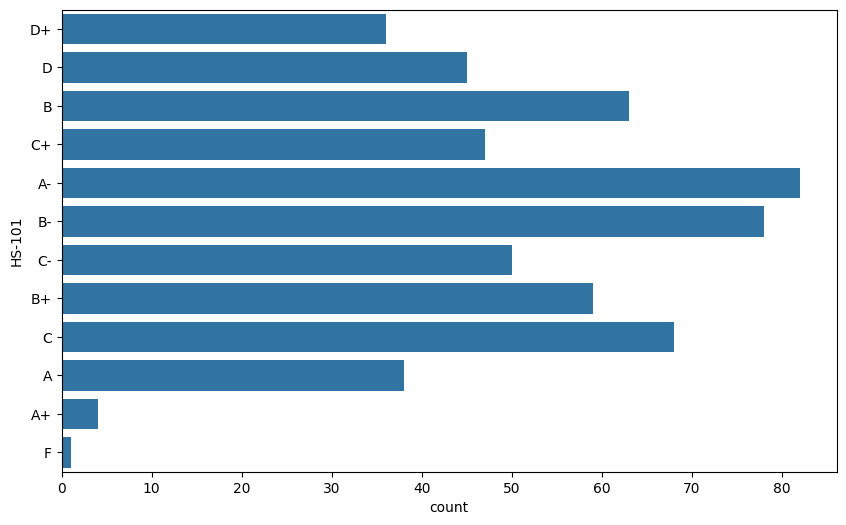

In [62]:
fig=plt.figure(figsize=(10,6))
sns.countplot(grd_df.iloc[:,2])

here from the above countplot  for course code HS-101 i observed that majority of the candidate got A- and B- grade A-(82 candidate)and B-(78 candidate) and only 1 student is failed in this course code

<Axes: xlabel='count', ylabel='CY-105'>

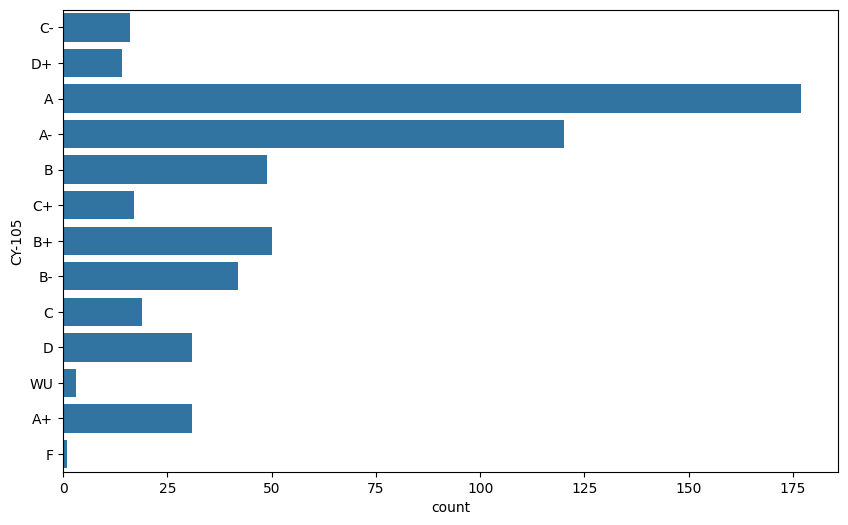

In [63]:
fig=plt.figure(figsize=(10,6))
sns.countplot(grd_df.iloc[:,3])

here from the above countplot  for course code Cy-105 i observed that majority of the candidate got A- and B- grade A(177 candidate)and A -(120candidate) and only 1 student is failed in this course code

<Axes: xlabel='count', ylabel='MT-111'>

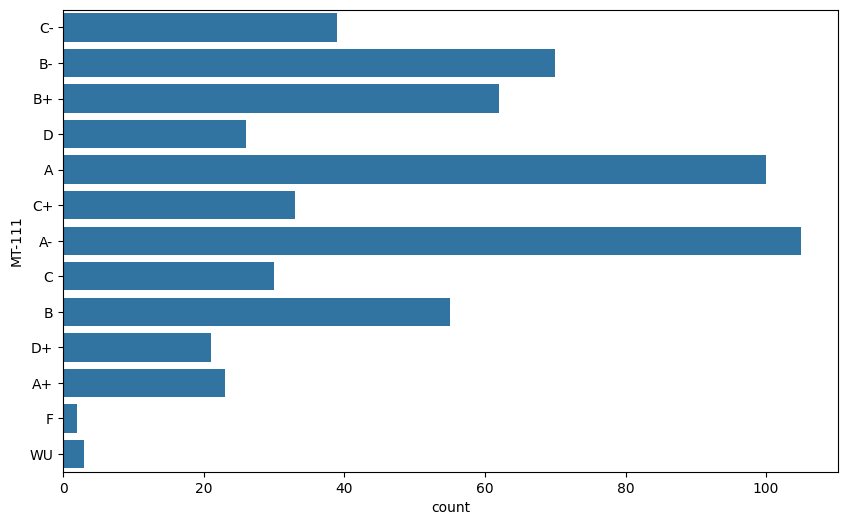

In [64]:
fig=plt.figure(figsize=(10,6))
sns.countplot(grd_df.iloc[:,5])

here from the above countplot  for course code MT-111 i observed that majority of the candidate got A- and A grade A-(105 candidate)and A (100 candidate) and only 3 student is failed in this course code

(array([167.,  44., 112.,  61.,  57.,  64.,  19.,  22.,   2.,  23.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

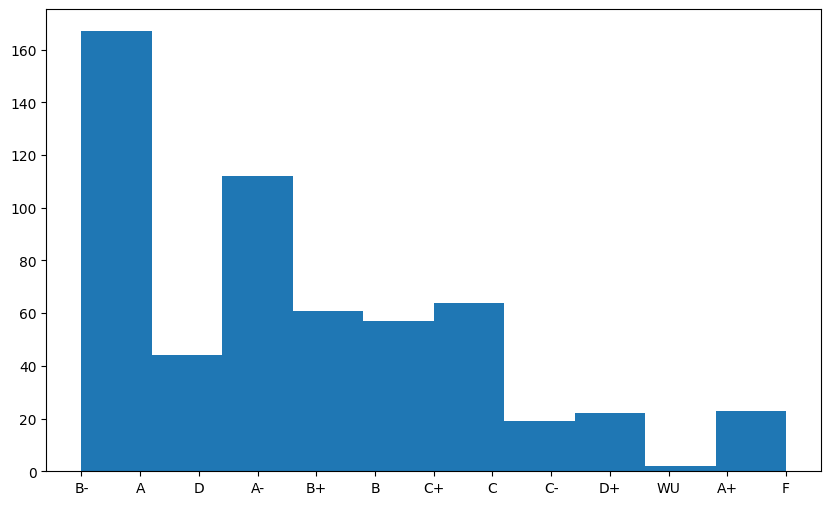

In [65]:
fig=plt.figure(figsize=(10,6))
plt.hist(grd_df.iloc[:,1])

<Axes: xlabel='PH-121'>

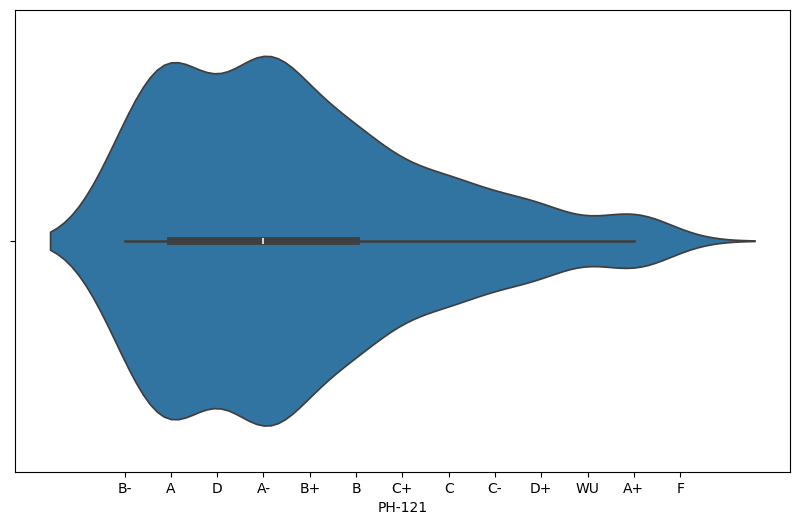

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(x=grd_df.iloc[:,1])

In [16]:
grd_df.iloc[:,1].value_counts()

PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64

In [ ]:
`#Here it is clear from the violinplot and the value count of each grade  that maxium width we observed for A- grade and for A

<Axes: xlabel='HS-101'>

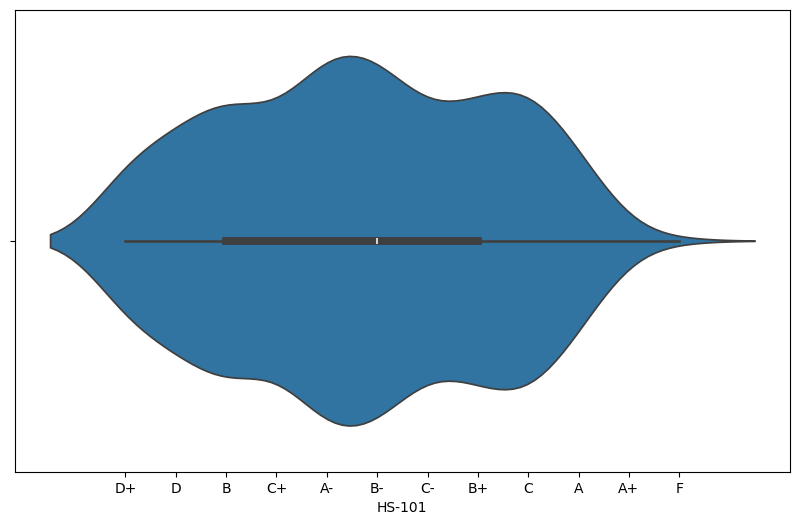

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(x=grd_df.iloc[:,2])

In [18]:
grd_df.iloc[:,2].value_counts()

HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64

In [ ]:
`#Here it is clear from the violinplot and the value count of each grade  that maxium width we observed for A- grade and for B- and very less A+ grade

<Axes: xlabel='MT-442'>

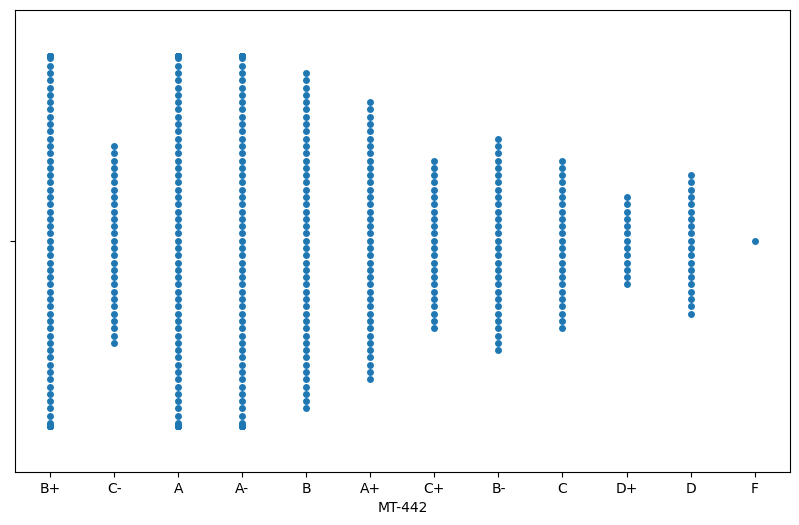

In [23]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=grd_df.iloc[:,29],size=5)

In [24]:
grd_df.iloc[:,29].value_counts()

MT-442
A-    140
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: count, dtype: int64

In [26]:
x=grd_df.iloc[:,0:42]

In [27]:
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,D+,D,C,D,A-,B-,C,C,B
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B+,D,B,B,C-,D,C,B,B-,C


In [28]:
x.shape

(571, 42)

In [29]:
y=grd_df.iloc[:,-1]

In [30]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [31]:
y.value_counts()

CGPA
3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: count, Length: 491, dtype: int64

In [32]:
y.shape

(571,)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encode=LabelEncoder()

In [35]:
x=x.apply(encode.fit_transform)

In [74]:
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,4,2,2,0,0,0,4,4,3,0
567,567,1,0,0,0,0,0,0,2,0,...,2,4,4,0,0,2,3,2,6,2
568,568,3,0,2,4,0,0,0,0,0,...,4,2,3,0,4,0,6,4,2,2
569,569,0,4,9,0,9,10,5,8,5,...,4,9,3,3,8,9,6,3,5,6


In [36]:
x['CGPA']=grd_df['CGPA']

In [37]:
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [38]:
correlation=x.corr()

<Axes: >

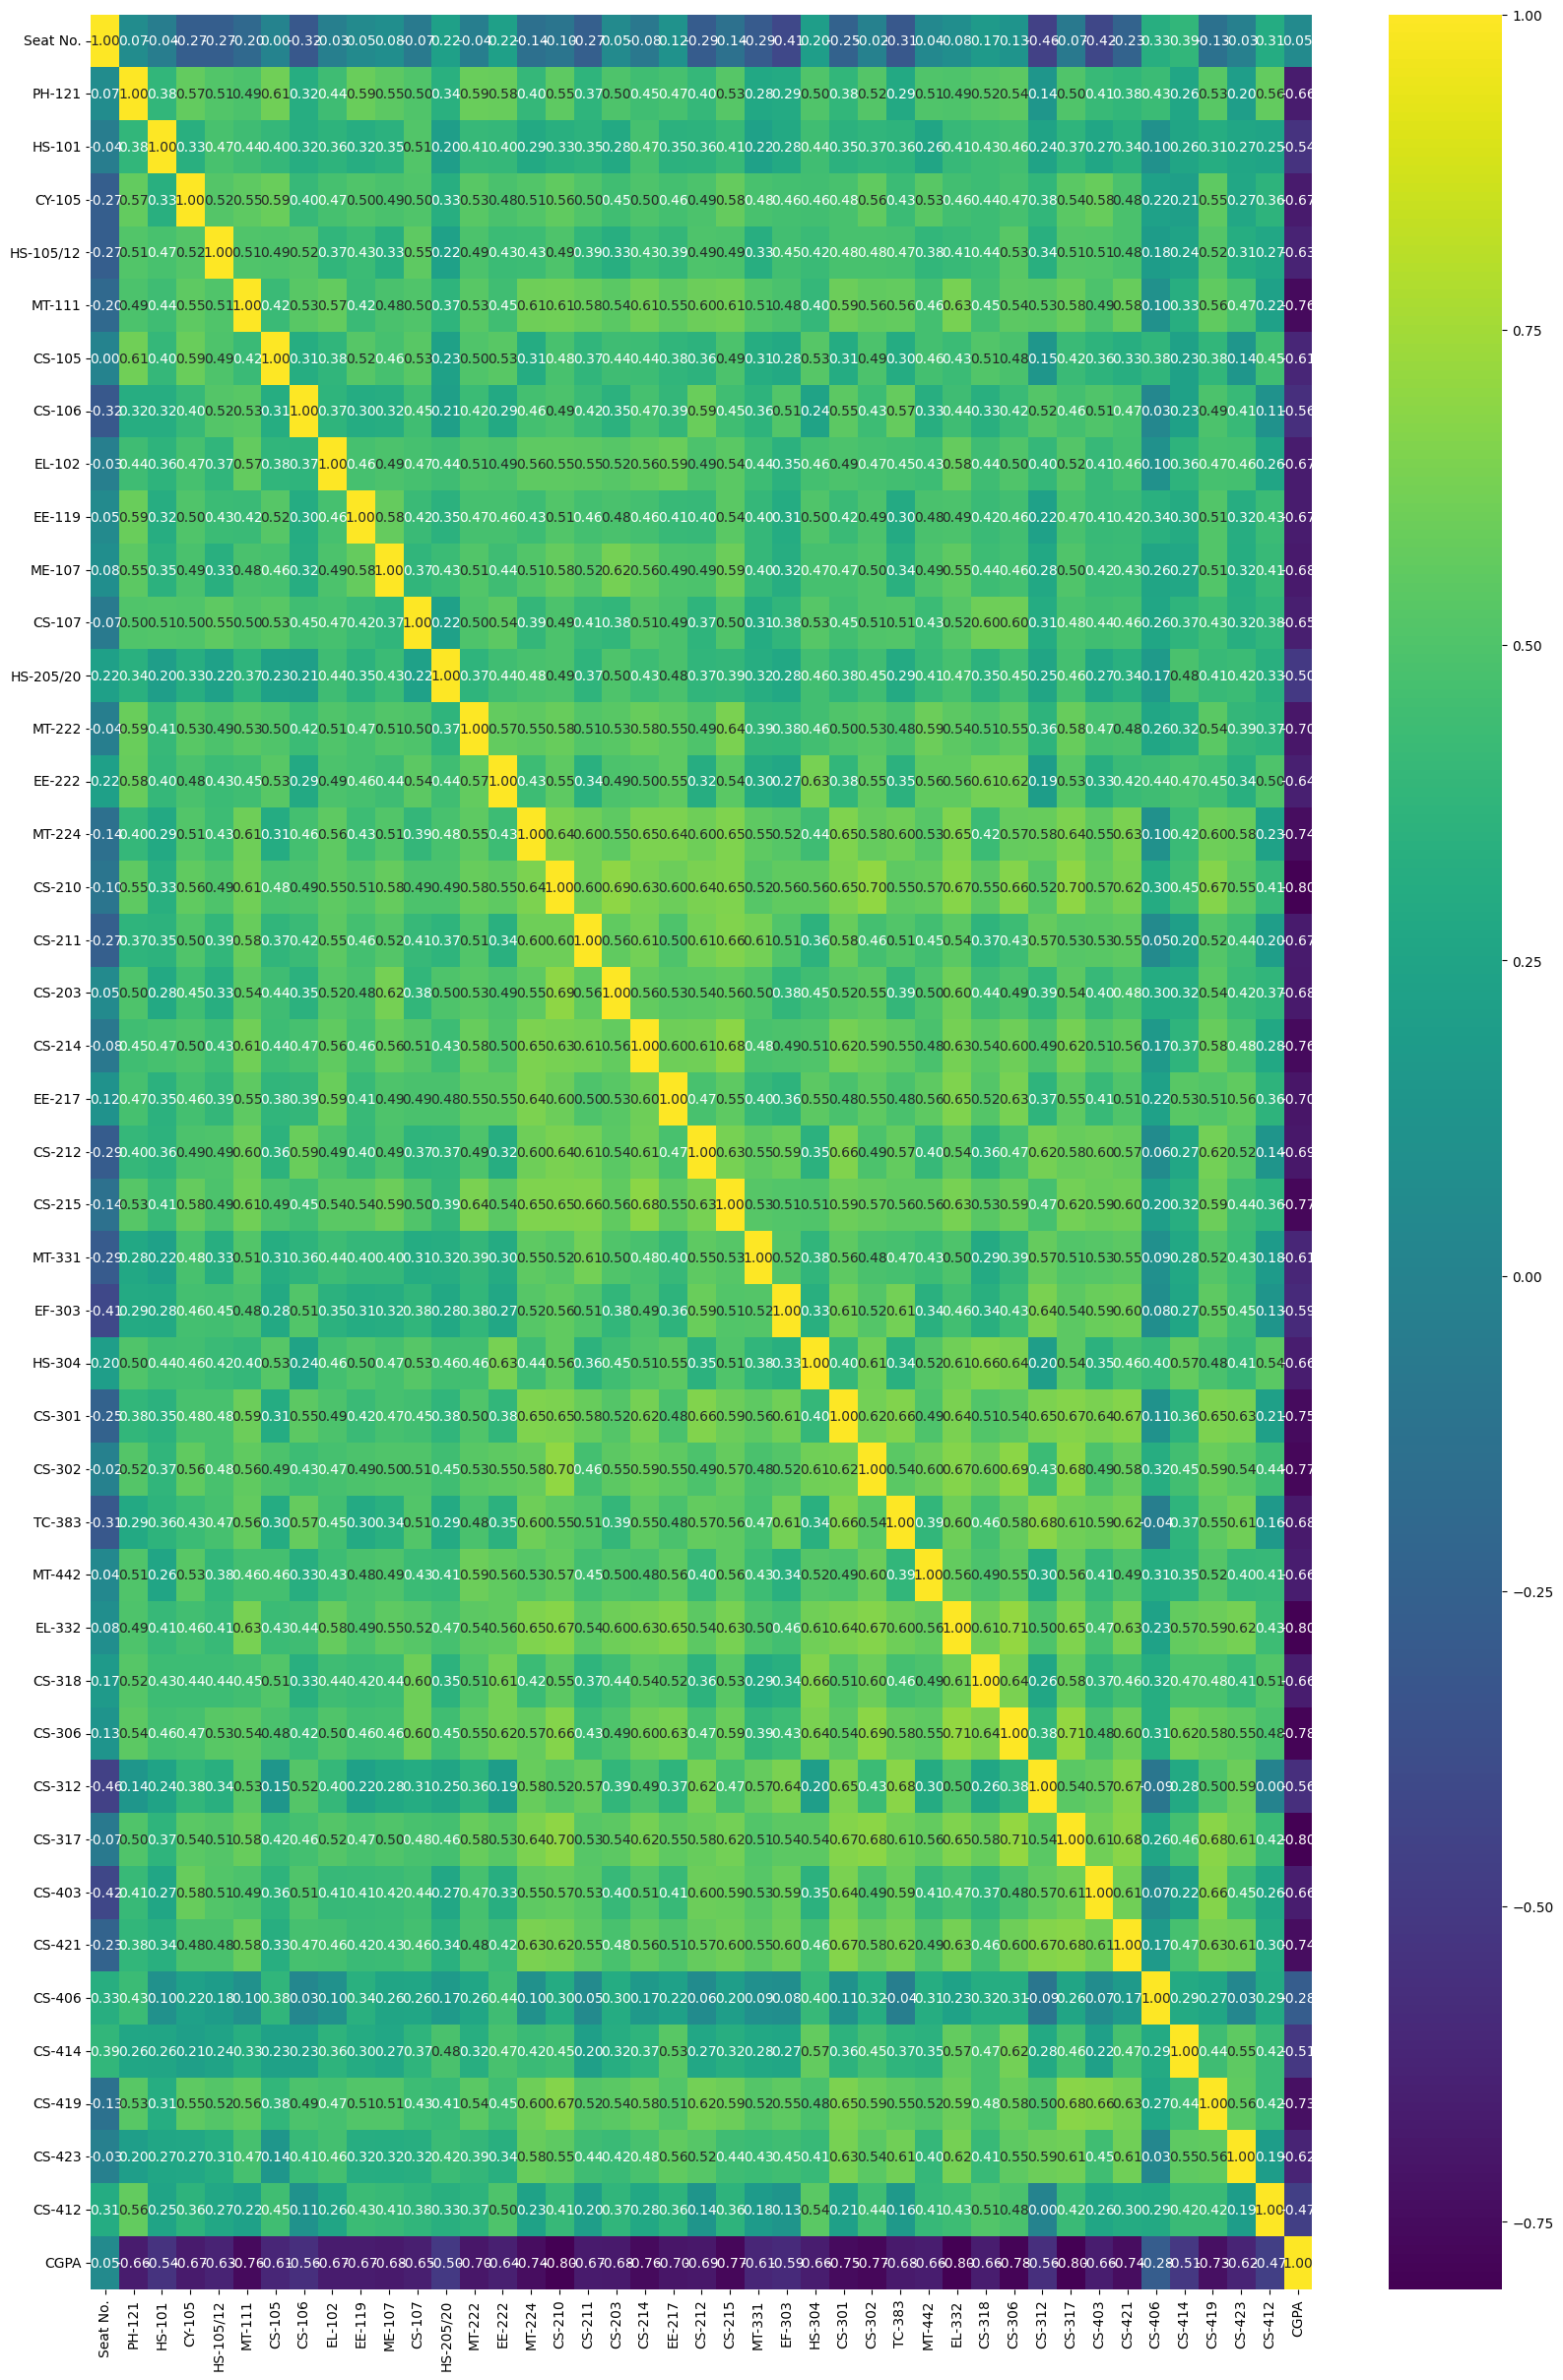

In [39]:
plt.figure(figsize=(20,30))
sns.heatmap(correlation,cmap='viridis',annot=True,fmt='.2f')

In [ ]:
#here from the above heat map grade in corresponding course code having positive correlationship with target variable CGPA

In [40]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputed_data=imputer.fit_transform(x)

In [42]:
x.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [95]:
x.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
#here now from the above output i have handled all the missing value in each feature

In [43]:
grd_df['PH-121'].isnull().sum()

0

here one thing we have observed that in the dataset Seat No feature is not essentIl for predict the our Target variable CGPA so i will removed it from our dataset

In [45]:
x.drop('Seat No.',axis=1,inplace=True)

In [46]:
x.skew()


PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

In [47]:
x['CS-406']=np.cbrt(x['CS-406'])

In [48]:
x['CS-412']=np.cbrt(x['CS-412'])

In [51]:
x['CS-414']=np.cbrt(x['CS-414'])

In [52]:
x.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406      -0.671251
CS-414      -0.382579
CS-419       0.773674
CS-423       0.627219
CS-412      -0.382579
CGPA        -0.497203
dtype: float64

In [107]:
x['CS-414']=np.cbrt(x['CS-414'])

In [53]:
x=x.drop('CGPA',axis=1)

In [54]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,1.259921,0.000000,8,3,0.000000
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,1.259921,1.709976,6,6,1.709976
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0.000000,0.000000,0,2,0.000000
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,1.709976,1.442250,7,7,1.442250
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,1.259921,0.000000,2,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0.000000,1.587401,4,3,1.587401
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,1.259921,1.442250,2,6,1.442250
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0.000000,1.817121,4,2,1.817121
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,2.080084,1.817121,3,5,1.817121


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,7.326120,PH-121
1,7.234820,HS-101
2,5.184228,CY-105
3,6.374946,HS-105/12
4,7.133207,MT-111
5,5.120410,CS-105
6,6.484455,CS-106
7,5.740855,EL-102
8,6.762240,EE-119
9,7.797914,ME-107


In [60]:
x.drop('CS-414',axis=1,inplace=True)

In [62]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [86]:
mxac=0
mxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>mxac:
        mxac=acc
        mxrs=i
print('maximum r2 score is',mxac,'at random state',mxrs)

maximum r2 score is 0.9685788383528633 at random state 75


In [65]:
en=ElasticNet()
en.fit(x_train,y_train)
rdpred_test=en.predict(x_test)
rdpred_train=en.predict(x_train)
print('R2_score',r2_score(y_test,rdpred_test)*100)
print('R2 score on training data',r2_score(y_train,rdpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,rdpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,rdpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,rdpred_test)))
print('cross validation score',cross_val_score(en,x,y,cv=5,scoring='r2').mean()*100)

R2_score 80.50877551713602
R2 score on training data 80.78883468557608
Mean Absolute Error 0.21858370633695137
Mean Squared  Error 0.07032479785960546
Root Mean Absolute Error 0.2651882309975416
cross validation score 76.70056973639429


In [66]:
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)
rfrpred_test=rfr.predict(x_test)
rfrpred_train=rfr.predict(x_train)
print('R2_score',r2_score(y_test,rfrpred_test)*100)
print('R2 score on training data',r2_score(y_train,rfrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,rfrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,rfrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,rfrpred_test)))
print('cross validation score',cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 96.1064453894428
R2 score on training data 98.89813003137307
Mean Absolute Error 0.0880497674418604
Mean Squared  Error 0.01404803690930231
Root Mean Absolute Error 0.11852441482370757
cross validation score 93.42373028785627


In [67]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpred_test=gbr.predict(x_test)
gbrpred_train=gbr.predict(x_train)
print('R2_score',r2_score(y_test,gbrpred_test))
print('R2 score on training data',r2_score(y_train,gbrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,gbrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,gbrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,gbrpred_test)))
print('cross validation score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 0.9703373149808605
R2 score on training data 99.7277534878304
Mean Absolute Error 0.08120588578541542
Mean Squared  Error 0.01070236674857494
Root Mean Absolute Error 0.10345224380638121
cross validation score 95.06306869255864


In [68]:
svr=SVR()
svr.fit(x_train,y_train)
svrpred_test=svr.predict(x_test)
svrpred_train=svr.predict(x_train)
print('R2_score',r2_score(y_test,svrpred_test)*100)
print('R2 score on training data',r2_score(y_train,svrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,svrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,svrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,svrpred_test)))
print('cross validation score',cross_val_score(svr,x,y,cv=5,scoring='r2').mean()*100)



R2_score 97.38577736509242
R2 score on training data 98.69567396906199
Mean Absolute Error 0.07281237223376084
Mean Squared  Error 0.00943217695335206
Root Mean Absolute Error 0.09711939535104232
cross validation score 96.10586623423988


In [69]:
score1=cross_val_score(lr,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between r2 score and cross validation score is ',r2_score(y_test,pred)-score1.mean())

[0.94399465 0.85083357 0.95212803 0.9512959  0.93447449]
0.926545327472561
difference between r2 score and cross validation score is  0.025246328046885536


In [70]:
score2=cross_val_score(en,x,y,cv=5)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,rdpred_test)-score2.mean())*100)

[0.81305099 0.72471089 0.79101745 0.74735629 0.75889287]
0.7670056973639429
difference between r2 score and cross validation score is  3.8082057807417358


In [71]:
score3=cross_val_score(rfr,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,rfrpred_test)-score3.mean())*100)

[0.95994722 0.88297134 0.95287385 0.94294049 0.93980645]
0.9357078684790439
difference between r2 score and cross validation score is  2.5356585415384103


In [72]:
gbrscore=cross_val_score(gbr,x,y,cv=5)
print(gbrscore)
print(gbrscore.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,gbrpred_test)-gbrscore.mean())*100)

[0.95741904 0.92060143 0.96500073 0.95987466 0.95395468]
0.9513701073390648
difference between r2 score and cross validation score is  1.8967207641795714


#Here from the above observation i have checked  the above algorithms and also checked the cross validation score the i  found that the  difference between r2 score and cross validation score  of Linear Regression model is very less i.e 0.025246328046885536

In [74]:
lr.coef_

array([-0.01027214, -0.01218646, -0.00659608, -0.00742054, -0.02307059,
       -0.0194584 ,  0.00161597, -0.00534616, -0.02789575, -0.00984221,
       -0.00382353,  0.0039772 , -0.00450554,  0.00211246, -0.00969088,
       -0.00661641, -0.00118422, -0.00715077, -0.01070294, -0.00625247,
       -0.00241422, -0.00174402, -0.00615583, -0.00240354,  0.0014097 ,
       -0.01593588, -0.01137677, -0.01224242,  0.00109314, -0.01347303,
        0.00261418, -0.01500389,  0.0084856 , -0.01468526, -0.0080388 ,
       -0.01663641, -0.00812506,  0.00830811, -0.00695282, -0.03887674])

In [75]:
lr.intercept_

4.148581417781649

In [80]:
from sklearn.model_selection import GridSearchCV

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
lr=LinearRegression()
lr.fit(x_train,y_train)
    
grid = GridSearchCV(estimator=lr, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(x_train, y_train)
lr.score(x_test,y_test)

0.9517916555194466

In [90]:
grid.best_params_

{'fit_intercept': True}

In [93]:
final_model=LinearRegression(fit_intercept=True,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9517916555194466


In [94]:
import joblib

In [95]:
joblib.dump(final_model,'student_grade_pred.pkl')

['student_grade_pred.pkl']

In [96]:
model=joblib.load('student_grade_pred.pkl')

In [97]:
df=pd.DataFrame()

In [98]:
prediction=model.predict(x_test)

In [99]:
dummy_test=np.array(y_test)

In [100]:
df['orginal']=dummy_test
df['prediction']=prediction
df

,orginal,prediction
0,2.822,2.677371
1,3.583,3.600430
2,2.699,2.789759
3,3.540,3.339571
4,3.241,3.179896
...,...,...
167,2.488,2.307345
168,3.580,3.594753
169,3.408,3.253501
170,2.953,2.817238


In [101]:
df[50:100]

,orginal,prediction
50,2.777,2.704585
51,3.369,3.322838
52,3.772,3.622805
53,2.599,2.367814
54,3.759,3.715848
55,2.999,2.992957
56,2.595,2.599972
57,3.164,3.127324
58,3.075,2.990857
59,3.248,3.291900
